Original shape: (119390, 10)

Missing values before cleanup:
Series([], dtype: int64)

Missing values after cleanup:
Series([], dtype: int64)

Unique values per categorical column:
market_segment    8
deposit_type      3
hotel             2
dtype: int64

Low-cardinality columns (One-Hot Encode): ['hotel', 'market_segment', 'deposit_type']
High-cardinality columns (Label Encode): []

Data shape after optimized encoding: (119390, 20)
Scaling complete.


c:\Users\ccequ\anaconda stoff\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\ccequ\anaconda stoff\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



Data shape after scaling and normalization: (119390, 20)


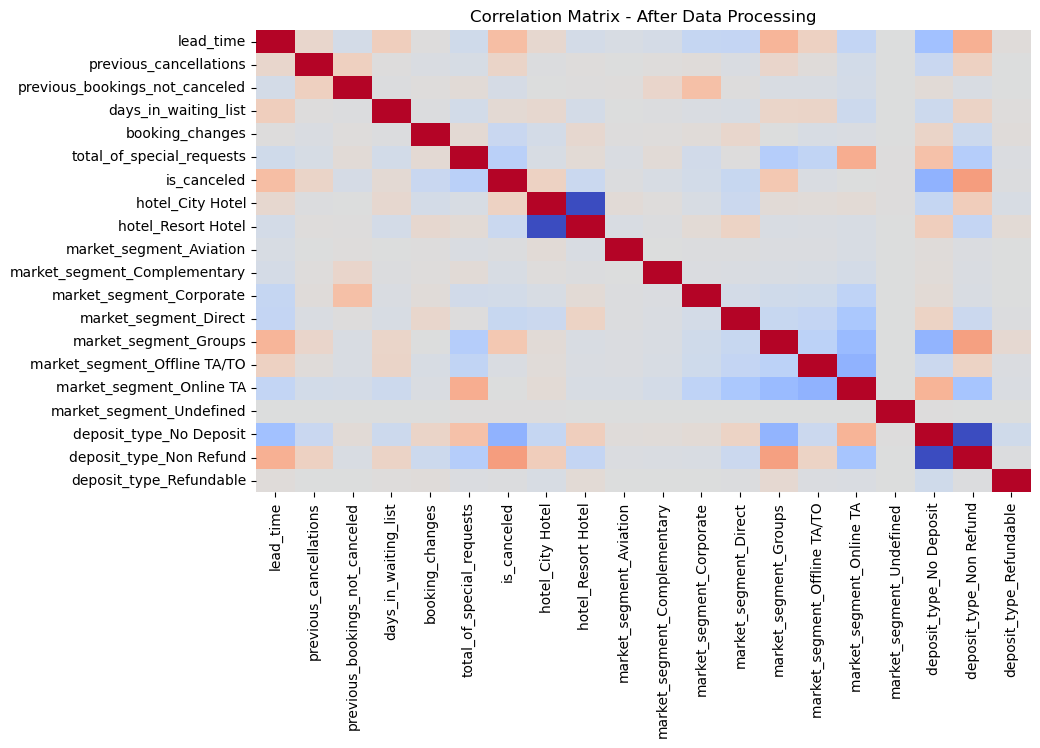


✅ Cleaned dataset saved as 'hotel_booking_cleaned.csv'


In [ ]:
# Midterm Project- Step 3, Part 2: After Data Cleanup
# Hotel Booking Dataset Before Data Processing
# By: Cristopher Cequea-Rivero

# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load Original Dataset
df = pd.read_csv('hotel_booking.csv')
print(f"Original shape: {df.shape}")

# (1.) Handling Missing Values

print("\nMissing values before cleanup:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Identify numeric and categorical columns automatically
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill numeric NaN values with median
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Fill categorical NaN values with mode
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after cleanup:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# (2.) Encoding Categorical Variables
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

# Check unique value counts
print("\nUnique values per categorical column:")
print(df[cat_cols].nunique().sort_values(ascending=False))

# Split categorical columns by cardinality
low_cardinality = [col for col in cat_cols if df[col].nunique() <= 20]
high_cardinality = [col for col in cat_cols if df[col].nunique() > 20]

print(f"\nLow-cardinality columns (One-Hot Encode): {low_cardinality}")
print(f"High-cardinality columns (Label Encode): {high_cardinality}")

# One-Hot Encode low-cardinality categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
encoded_sparse = encoder.fit_transform(df[low_cardinality])
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_sparse, columns=encoder.get_feature_names_out(low_cardinality))

# Label Encode high-cardinality features
for col in high_cardinality:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Combine encoded + numeric data
df_encoded = pd.concat([
    df[num_cols].reset_index(drop=True),
    df[high_cardinality].reset_index(drop=True),
    encoded_df.reset_index(drop=True)
], axis=1)

print(f"\nData shape after optimized encoding: {df_encoded.shape}")

# (3.) Feature Scaling (MinMaxScaler)
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)
print("Scaling complete.")

# (4.) Normalization (StandardScaler for distribution adjustment)
scaler_norm = StandardScaler()
normalized_data = pd.DataFrame(scaler_norm.fit_transform(scaled_data), columns=scaled_data.columns)
print(f"\nData shape after scaling and normalization: {normalized_data.shape}")

# (5.) Correlation Heatmap After Processing
plt.figure(figsize=(10,6))
sns.heatmap(normalized_data.corr(numeric_only=True), cmap='coolwarm', cbar=False)
plt.title('Correlation Matrix - After Data Processing')
plt.show()

# (6.) Save Cleaned Dataset
normalized_data.to_csv('hotel_booking_cleaned.csv', index=False)
print("\n✅ Cleaned dataset saved as 'hotel_booking_cleaned.csv'")

# (7.) Techniques Implemented

# 1. Handling Missing Values:
#   -Numerical columns (e.g., 'children', 'agent', 'company') filled using median to reduce outlier influence.
#   -Categorical columns filled with mode (most frequent category) to maintain consistency.

# 2. Encoding (Categorical to Numerical):
#   -One-Hot Encoding used for categorical variables.
#   -Ensures the model can interpret string data by converting them into binary columns.

# 3. Scaling:
#   -MinMaxScaler used to transform all numeric features to a 0-1 range.
#   -Prevents large-scale variables (like ADR) from dominating smaller ones.

# 4. Normalization:
#   -StandardScaler applied to adjust feature distributions to mean = 0 and std = 1.
#   -Helps models like Logistic Regression and SVM perform better.

# 5. Verification:
#   -Correlation heatmap checked to ensure relationships between variables remain reasonable post-scaling.

# Next Steps:
# -Use this cleaned dataset to build and test ML models (e.g., Random Forest, Logistic Regression) for predicting cancellations.
# -Save the 'hotel_booking_cleaned.csv' for your final project stage.
